In [654]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\z004zfym\OneDrive - Siemens AG\Documents\RiskAnalysisCaseStudyYashwantYadav\loan.csv", low_memory=False)
print(df.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [655]:
## Removing empty columns from my df as they wont be paying any role in my analysis

null_col = list()
for col in df.columns:
    if df[col].isnull().all():
        null_col.append(col)
len(null_col)

df_non_null = df.drop(columns=null_col)


In [656]:
df_non_null.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [657]:
for col in df_non_null.columns:
    if len(df_non_null[col].unique()) < 10 :
        print(df_non_null[col].unique(), col)

[' 36 months' ' 60 months'] term
['B' 'C' 'A' 'E' 'F' 'D' 'G'] grade
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] home_ownership
['Verified' 'Source Verified' 'Not Verified'] verification_status
['Fully Paid' 'Charged Off' 'Current'] loan_status
['n'] pymnt_plan
[1 5 2 0 3 4 6 7 8] inq_last_6mths
[0 1 2 3 4] pub_rec
['f'] initial_list_status
[nan 'Jun-16' 'Jul-16'] next_pymnt_d
[ 0. nan] collections_12_mths_ex_med
[1] policy_code
['INDIVIDUAL'] application_type
[0] acc_now_delinq
[ 0. nan] chargeoff_within_12_mths
[0] delinq_amnt
[ 0.  1.  2. nan] pub_rec_bankruptcies
[ 0. nan] tax_liens


In [658]:
# converting term to year for understanding

df_non_null['term'] = df_non_null['term'].apply(lambda x : 3 if x == ' 36 months' else 5)
df_non_null['term'].unique()
df_non_null = df_non_null.drop(columns=['pymnt_plan', 'policy_code', 'acc_now_delinq', 'delinq_amnt', 'initial_list_status'])
df_non_null = df_non_null.drop(columns=['tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'])

In [659]:
df_non_null.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,3,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,5,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,3,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,3,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,5,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,INDIVIDUAL,0.0


In [660]:
for col in df_non_null.columns:
    if len(df_non_null[col].unique()) < 10 :
        print(df_non_null[col].unique(), col)

[3 5] term
['B' 'C' 'A' 'E' 'F' 'D' 'G'] grade
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE'] home_ownership
['Verified' 'Source Verified' 'Not Verified'] verification_status
['Fully Paid' 'Charged Off' 'Current'] loan_status
[1 5 2 0 3 4 6 7 8] inq_last_6mths
[0 1 2 3 4] pub_rec
[nan 'Jun-16' 'Jul-16'] next_pymnt_d
['INDIVIDUAL'] application_type
[ 0.  1.  2. nan] pub_rec_bankruptcies


In [661]:
df_non_null = df_non_null.drop(columns=['application_type'])
df_non_null['pub_rec_bankruptcies'] = df_non_null['pub_rec_bankruptcies'].apply(lambda x : 0 if pd.isna(x) else int(x))
df_non_null['pub_rec_bankruptcies'].unique()

array([0, 1, 2])

In [662]:
for col in df_non_null.columns:
    if len(df_non_null[col].unique()) > 10 and len(df_non_null[col].unique()) < 40:
        print(df_non_null[col].unique(), col)

['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5'] sub_grade
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan] emp_length
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational'] purpose
[ 0  2  3  1  4  6  5  8  7  9 11] delinq_2yrs


In [663]:
emp_len = {'10+ years': 10,  '< 1 year' : 0,  '1 year' : 1,  '3 years' : 3, '8 years': 8,  '9 years': 9,  '4 years' : 4, 
 '5 years': 5,  '6 years':6,  '2 years':2,  '7 years':7}

df_non_null['emp_length']= df_non_null['emp_length'].apply(lambda x: 0 if pd.isna(x) else emp_len[x])





In [664]:
for col in df_non_null.columns:
    if len(df_non_null[col].unique()) > 40 and len(df_non_null[col].unique()) < 80:
        print(df_non_null[col].unique(), col)

['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07'] issue_d
['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'OK'
 'DE' 'MS' 'TN' 'IA' 'NE' 'ID' 'IN' 'ME'] addr_state


In [665]:
df_non_null['loan_issue_month'] = df_non_null['issue_d'].apply(lambda x: x.split('-')[1])
df_non_null['loan_issue_year'] = df_non_null['issue_d'].apply(lambda x : x.split('-')[0])
df_non_null = df_non_null.drop(columns=['issue_d'])

In [666]:
for col in df_non_null.columns:
    if len(df_non_null[col].unique()) > 80 and len(df_non_null[col].unique()) < 200:
        print(df_non_null[col].unique(), col)

[ nan  35.  38.  61.   8.  20.  18.  68.  45.  48.  41.  40.  74.  25.
  53.  39.  10.  26.  56.  77.  28.  52.  24.  16.  60.  54.  23.   9.
  11.  13.  65.  19.  80.  22.  59.  79.  44.  64.  57.  14.  63.  49.
  15.  73.  70.  29.  51.   5.  75.  55.   2.  30.  47.  33.  69.   4.
  43.  21.  27.  46.  81.  78.  82.  31.  76.  62.  72.  42.  50.   3.
  12.  67.  36.  34.  58.  17.  71.  66.  32.   6.  37.   7.   1.  83.
  86. 115.  96. 103. 120. 106.  89. 107.  85.  97.  95.   0.] mths_since_last_delinq
[ nan 113. 105.  97.  33.  93.  52.  85.  90.  91. 114.  92. 117.  87.
  45.  83. 118.  38. 101. 100. 112. 110.  88.  79.  77. 107. 102.  98.
  95. 103.  96. 116. 111.  89. 108.  29. 106. 115.  53.  86.  57.  63.
  94. 109.  99. 104.  76.  61.  28.  23.  75.  47.  82.  21.  62.  44.
  80.  67. 119.  42.  34.  66.  58.  22.  56.  72.  64.  50.  69.  49.
  74.  35.  12.  26.  78.  54.  37.  73.  11.  31.  59.  32.  81.  68.
  55.  39.  51.  70.  30.  41.  71.  40.  43.  27.  65.  46.  1

In [667]:
df_non_null['mths_since_last_record'] = df_non_null['mths_since_last_record'].apply(lambda x : 0 if pd.isna(x) else int(x))
df_non_null['mths_since_last_delinq'] = df_non_null['mths_since_last_delinq'].apply(lambda x : 0 if pd.isna(x) else int(x))
df_non_null['last_credit_pull_date_month'] = df_non_null['last_credit_pull_d'].apply(lambda x: x.split('-')[1] if isinstance(x, str) else x)
df_non_null['last_credit_pull_date_year']  = df_non_null['last_credit_pull_d'].apply(lambda x: x.split('-')[0] if isinstance(x, str) else x)


df_non_null['last_payment_month'] = df_non_null['last_pymnt_d'].apply(lambda x : x.split('-')[0] if isinstance(x, str) else x)
df_non_null['last_payment_date'] = df_non_null['last_pymnt_d'].apply(lambda x : x.split('-')[1] if isinstance(x, str) else x)

df_non_null = df_non_null.drop(columns = ['last_credit_pull_d', 'last_pymnt_d'])

In [668]:
for col in df_non_null.columns:
    if len(df_non_null[col].unique()) > 200:
        print(df_non_null[col].unique(), col)

[1077501 1077430 1077175 ...   90395   90376   87023] id
[1296599 1314167 1313524 ...   90390   89243   86999] member_id
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500  4375 31825 12400 10800
 12500  9600  4400 14000 11000 25600 16000  7100 13000 17500 17675  8000
  3500 16425  8200 20975  6400 14400  7250 18000 35000 11800  4500 10500
 15300 20000  6200  7200  9500 18825 24000  2100  5500 26800 25000 19750
 13650 28000 10625  8850  6375 11100  4200  8875 13500 21600  8450 13475
 22000  7325  7750 13350 22475  8400 13250  7350 11500 29500  2000 11625
 15075  5300  8650  7400 24250 26000  1500 19600  4225 16500 15600 14125
 13200 12300  1400  3200 11875  1800 23200  4800  7300 10400  6600 30000
  4475  6300  8250  9875 21500  7800  9750 15550 17000  7500  5800  8050
  5400  4125  9800 15700  9900  6250 10200 23000 25975 21250 33425  8125
 18800 19200 12875  2625 11300  4100 18225 18500 16800  2200 14050 16100
 10

In [669]:
df_non_null['collection_recovery_fee'].unique()

array([0.0000e+00, 1.1100e+00, 2.0900e+00, ..., 6.6836e+02, 4.4425e+02,
       2.3000e-01])

In [670]:
df_non_null.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d',
       'pub_rec_bankruptcies', 'loan_issue_month', 'loan_issue_year',
       'last_credit_pull_date_month', 'last_credit_pull_date_year',
       'last_payment_month', 'last_payment_date'],
      dtype='object')

In [671]:
df_non_null['defaulted'] = df_non_null['loan_status'].apply(lambda x :  1 if x == 'Charged Off' else 0)

df_non_null.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d',
       'pub_rec_bankruptcies', 'loan_issue_month', 'loan_issue_year',
       'last_credit_pull_date_month', 'last_credit_pull_date_year',
       'last_payment_month', 'last_payment_date', 'defaulted'],
      dtype='object')

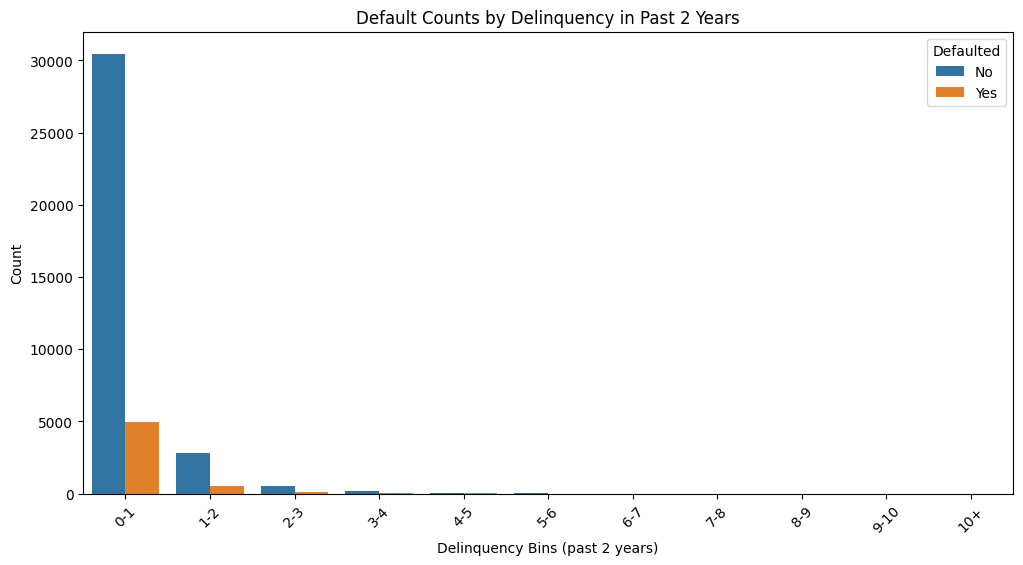

In [672]:
import seaborn as sns
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, df_non_null['delinq_2yrs'].max()]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10+']

# Assign the bins to a new column in the DataFrame
df_non_null['delinq_bins'] = pd.cut(df_non_null['delinq_2yrs'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 6))
sns.countplot(data=df_non_null, x='delinq_bins', hue='defaulted')
plt.title('Default Counts by Delinquency in Past 2 Years')
plt.xlabel('Delinquency Bins (past 2 years)')
plt.ylabel('Count')
plt.legend(title='Defaulted', labels=['No', 'Yes'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

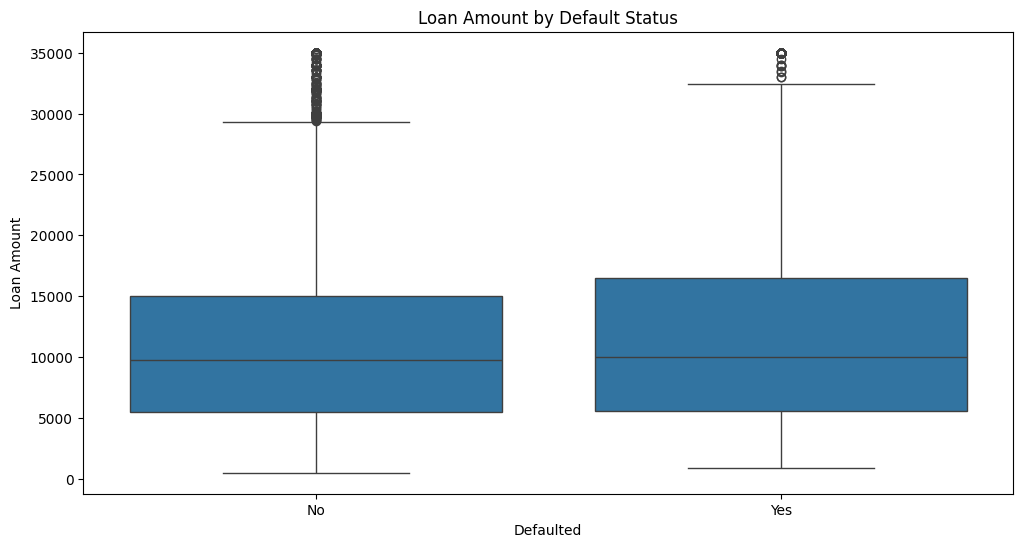

In [673]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_non_null, x='defaulted', y='loan_amnt')
plt.title('Loan Amount by Default Status')
plt.xlabel('Defaulted')
plt.ylabel('Loan Amount')
plt.xticks([0, 1], ['No', 'Yes'])  # Setting labels for default status
plt.show()

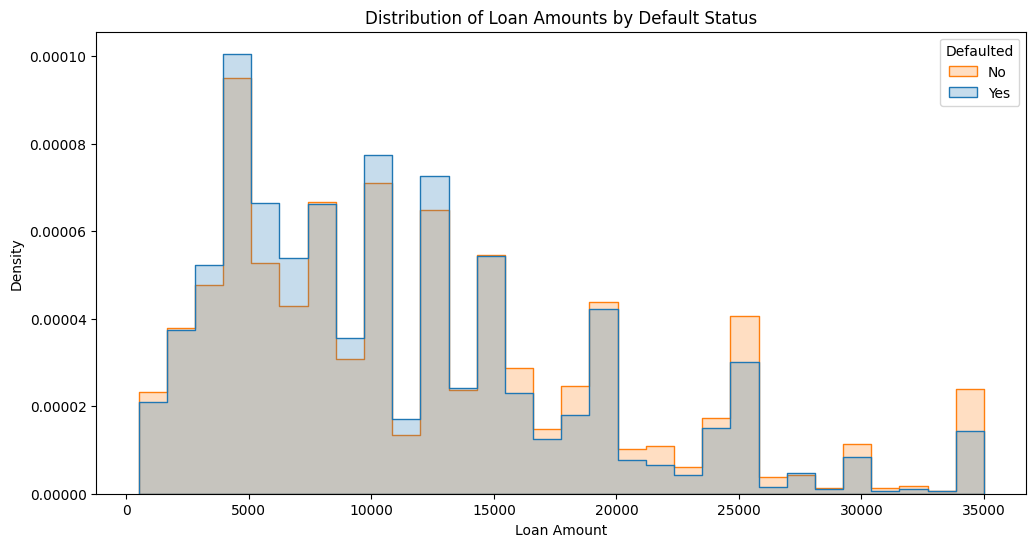

In [674]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df_non_null, x='loan_amnt', hue='defaulted', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribution of Loan Amounts by Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title='Defaulted', labels=['No', 'Yes'])
plt.show()

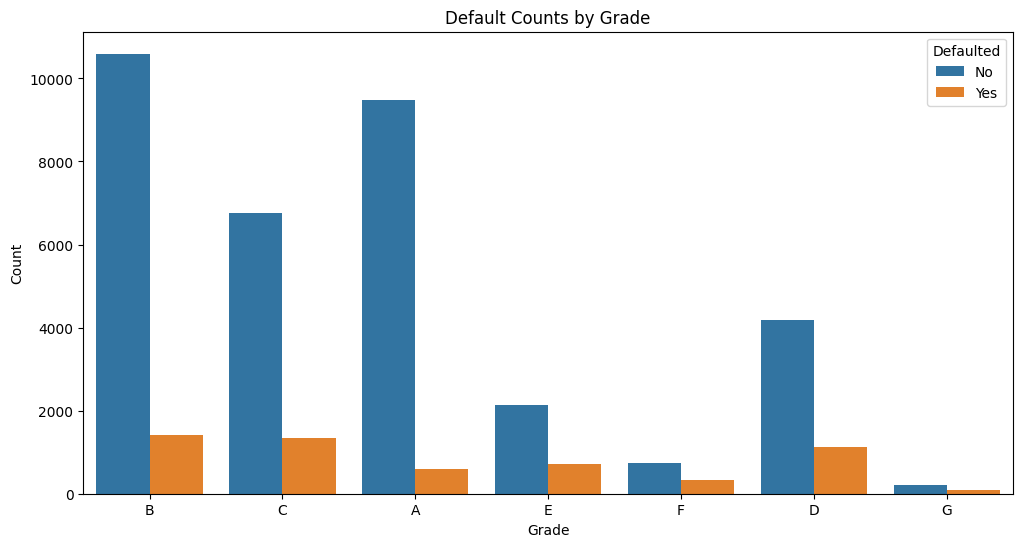

In [675]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.countplot(data=df_non_null, x='grade', hue='defaulted')
plt.title('Default Counts by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Defaulted', labels=['No', 'Yes'])
plt.show()

In [676]:

# default_rates = df_non_null.groupby('grade')['defaulted'].mean().reset_index()
# default_rates['defaulted'] = default_rates['defaulted'].map({0: 'No', 1: 'Yes'})
# print("Default Rates by Grade:")
# print(default_rates)


# default_rates_home = df_non_null.groupby('home_ownership')['defaulted'].mean().reset_index()
# default_rates_home['defaulted'] = default_rates_home['defaulted'].map({0: 'No', 1: 'Yes'})
# print("\nDefault Rates by Home Ownership:")
# print(default_rates_home)

print(df_non_null['defaulted'].isnull().sum())

0


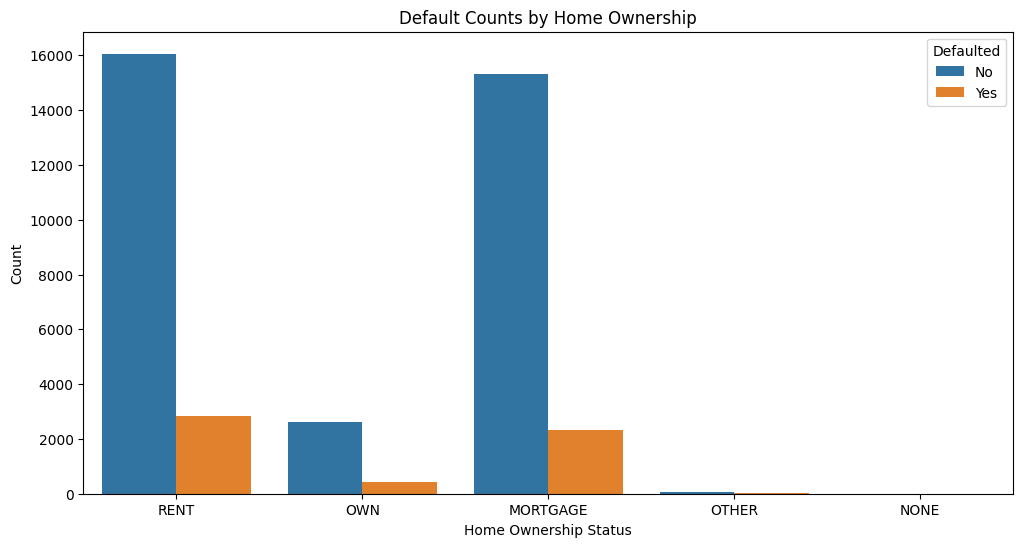

In [677]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_non_null, x='home_ownership', hue='defaulted')
plt.title('Default Counts by Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.legend(title='Defaulted', labels=['No', 'Yes'])
plt.show()

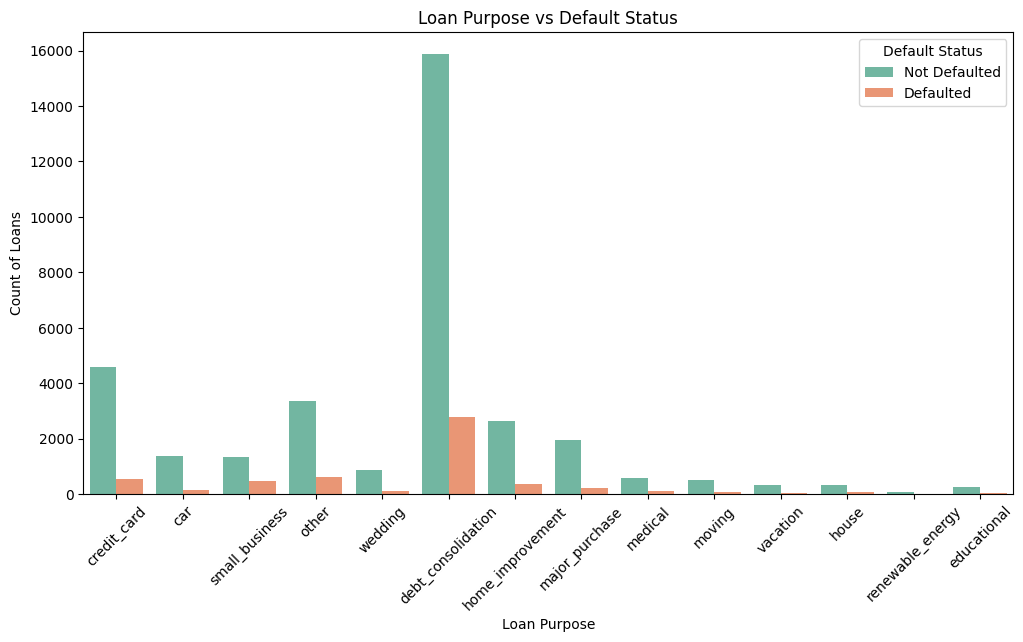

In [678]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_non_null, x='purpose', hue='defaulted', palette='Set2')
plt.title('Loan Purpose vs Default Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count of Loans')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Default Status', labels=['Not Defaulted', 'Defaulted'])
plt.show()

In [679]:

df_non_null['int_rate'] = df_non_null['int_rate'].str.replace('%', '').astype(float) / 100


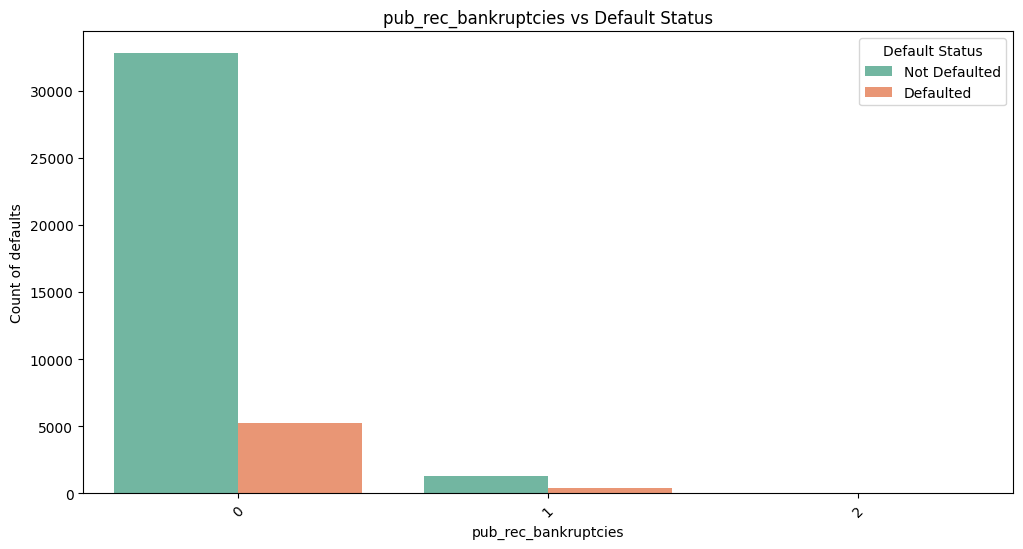

In [680]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_non_null, x='pub_rec_bankruptcies', hue='defaulted', palette='Set2')
plt.title('pub_rec_bankruptcies vs Default Status')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count of defaults')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Default Status', labels=['Not Defaulted', 'Defaulted'])
plt.show()

In [681]:
df_non_null = df_non_null.dropna()

In [682]:
df_non_null['pub_rec_bankruptcies'].unique()



array([0, 1, 2])

In [683]:
df_non_null.head()
df_non_null.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,defaulted
count,6.800000e+02,6.800000e+02,680.000000,680.000000,680.000000,680.0,680.000000,680.000000,680.000000,680.000000,...,680.000000,680.000000,680.000000,680.000000,680.000000,680.0,680.0,680.000000,680.000000,680.0
mean,9.111689e+05,1.127080e+06,17608.602941,17043.308824,16850.202517,5.0,0.150524,409.381088,6.050000,77035.284353,...,22615.023691,22306.733941,15191.503706,7422.374515,1.145503,0.0,0.0,411.371471,0.032353,0.0
std,1.052203e+05,1.165508e+05,8660.208519,8176.121282,8078.875713,0.0,0.035509,206.077569,3.560191,47715.909594,...,11263.507855,11073.408778,7177.147983,4492.803019,6.796315,0.0,0.0,206.617489,0.192985,0.0
min,7.064720e+05,8.986850e+05,1500.000000,1500.000000,1500.000000,5.0,0.060000,30.770000,0.000000,10020.000000,...,1750.590000,1750.590000,1406.760000,343.830000,0.000000,0.0,0.0,30.770000,0.000000,0.0
25%,8.162955e+05,1.023177e+06,12000.000000,12000.000000,11968.750000,5.0,0.119900,268.385000,3.000000,48000.000000,...,14875.125000,14620.675000,10484.882500,4218.605000,0.000000,0.0,0.0,271.032500,0.000000,0.0
50%,8.841830e+05,1.098512e+06,16000.000000,16000.000000,15762.500000,5.0,0.146500,376.460000,6.000000,66000.000000,...,20773.295000,20558.385000,14027.240000,6722.120000,0.000000,0.0,0.0,377.490000,0.000000,0.0
75%,1.016140e+06,1.243660e+06,24000.000000,22143.750000,21975.000000,5.0,0.179900,542.292500,10.000000,92250.000000,...,29810.760000,29080.497500,19854.125000,9887.192500,0.000000,0.0,0.0,543.190000,0.000000,0.0
max,1.075358e+06,1.311748e+06,35000.000000,35000.000000,35000.000000,5.0,0.239100,981.450000,10.000000,650000.000000,...,52983.990000,52880.720000,34279.220000,23506.560000,104.560000,0.0,0.0,981.450000,2.000000,0.0


In [684]:
summary_stats = df_non_null.groupby(['term', 'defaulted'])['installment'].agg(['mean', 'median', 'std', 'count']).reset_index()
print(summary_stats)

   term  defaulted        mean  median         std  count
0     5          0  409.381088  376.46  206.077569    680
